This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0]

1

In [ ]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Build a Model 1**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.6729 - loss: 0.6248 - val_accuracy: 0.8594 - val_loss: 0.4042
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.8902 - loss: 0.3423 - val_accuracy: 0.8801 - val_loss: 0.3173
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9241 - loss: 0.2354 - val_accuracy: 0.8862 - val_loss: 0.2831
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9400 - loss: 0.1865 - val_accuracy: 0.8782 - val_loss: 0.2976
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9555 - loss: 0.1481 - val_accuracy: 0.8864 - val_loss: 0.2809
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9625 - loss: 0.1252 - val_accuracy: 0.8855 - val_loss: 0.2955
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9728 - loss: 0.1023 - val_accuracy: 0.8799 - val_loss: 0.3110
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9754 - loss: 0.0880 - val_accuracy: 0.8805 - v

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

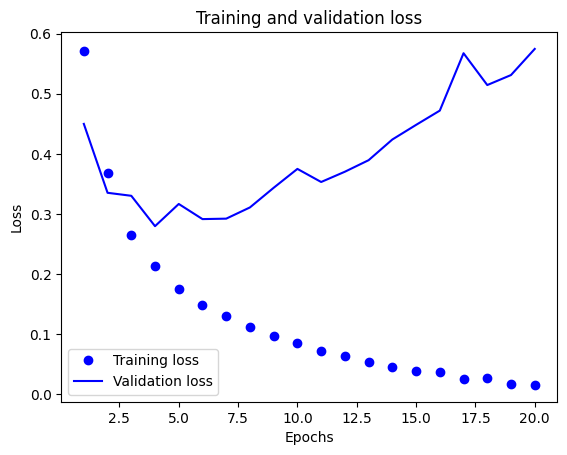

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

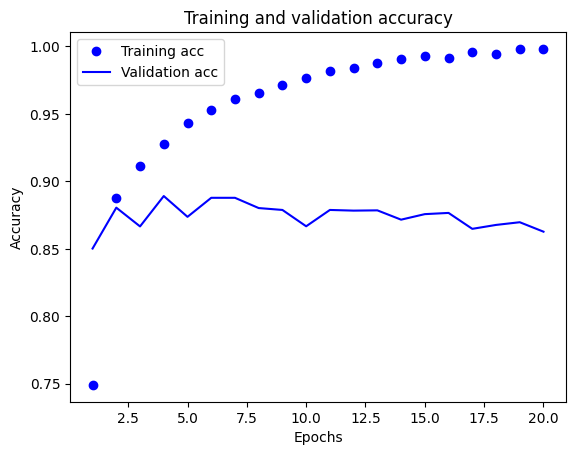

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.7234 - loss: 0.5709
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9042 - loss: 0.2949
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9221 - loss: 0.2217
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9340 - loss: 0.1867
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8854 - loss: 0.2844


In [ ]:
results_test

[0.2826191186904907, 0.8875600099563599]

In [ ]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_val, y_val)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9437 - loss: 0.1612
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9502 - loss: 0.1440
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9566 - loss: 0.1279
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9628 - loss: 0.1151
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9671 - loss: 0.1016


In [ ]:
results_val

[0.10560183227062225, 0.9657999873161316]

### Using a trained model to generate predictions on new data

In [ ]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0.1292969 ],
       [0.9999963 ],
       [0.83413035],
       ...,
       [0.1527268 ],
       [0.07647505],
       [0.88777274]], dtype=float32)

**Build Model 2**

In [ ]:
# Build model with one hidden layer
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

**Validating your approach**

**Setting aside a validation set**

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training the model**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.7264 - loss: 0.5855 - val_accuracy: 0.8515 - val_loss: 0.4250
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.8869 - loss: 0.3682 - val_accuracy: 0.8796 - val_loss: 0.3405
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9099 - loss: 0.2858 - val_accuracy: 0.8778 - val_loss: 0.3146
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9221 - loss: 0.2390 - val_accuracy: 0.8886 - val_loss: 0.2884
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9351 - loss: 0.2074 - val_accuracy: 0.8883 - val_loss: 0.2823
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9422 - loss: 0.1855 - val_accuracy: 0.8810 - val_loss: 0.2947
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9494 - loss: 0.1660 - val_accuracy: 0.8865 - val_loss: 0.2767
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9542 - loss: 0.1534 - val_accuracy: 0.8857 - 

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

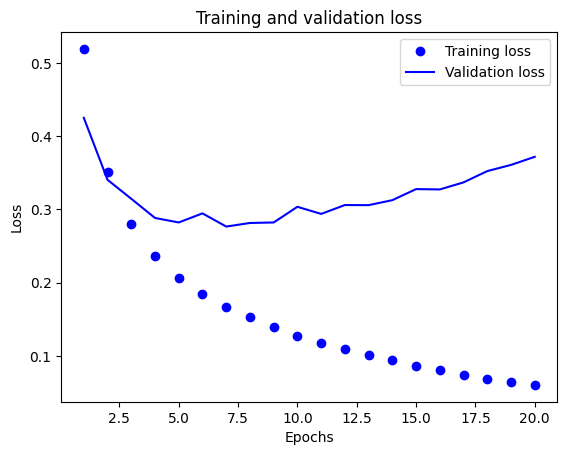

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

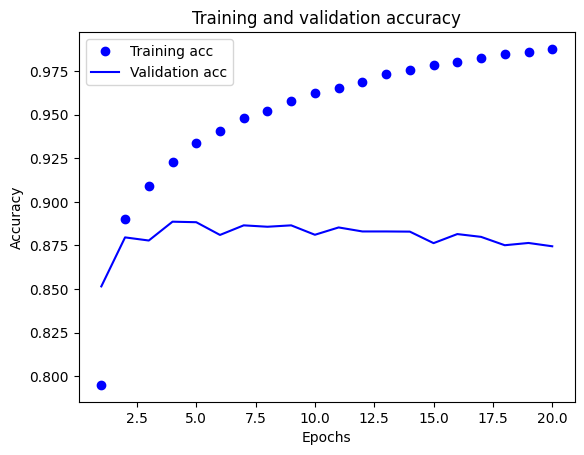

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7575 - loss: 0.5489
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9021 - loss: 0.3110
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9192 - loss: 0.2424
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.9298 - loss: 0.2080
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8843 - loss: 0.2871


In [ ]:
results_test

[0.2842176854610443, 0.8867599964141846]

In [ ]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9563 - loss: 0.1345
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9606 - loss: 0.1270
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9616 - loss: 0.1179
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9669 - loss: 0.1097
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8701 - loss: 0.3502


In [ ]:
results_val

[0.34891462326049805, 0.8712800145149231]

**Using a trained model to generate predictions on new data**

In [ ]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.07975834],
       [0.9998435 ],
       [0.11701326],
       ...,
       [0.07350139],
       [0.02399093],
       [0.56455773]], dtype=float32)

**Model 3**

In [ ]:
# build the model with three hidden layer
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

**Validating your approach**

**Setting aside a validation set**

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training the model**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.6655 - loss: 0.6144 - val_accuracy: 0.8672 - val_loss: 0.3879
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.8909 - loss: 0.3294 - val_accuracy: 0.8742 - val_loss: 0.3231
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9270 - loss: 0.2255 - val_accuracy: 0.8909 - val_loss: 0.2790
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.9440 - loss: 0.1738 - val_accuracy: 0.8899 - val_loss: 0.2764
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.9552 - loss: 0.1400 - val_accuracy: 0.8875 - val_loss: 0.2864
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9660 - loss: 0.1135 - val_accuracy: 0.8858 - val_loss: 0.3032
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9686 - loss: 0.1026 - val_accuracy: 0.8805 - val_loss: 0.3245
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9796 - loss: 0.0763 - val_accuracy: 0.8819 - v

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

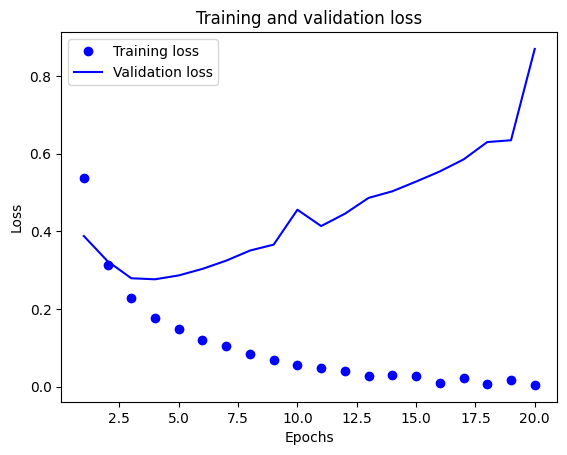

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

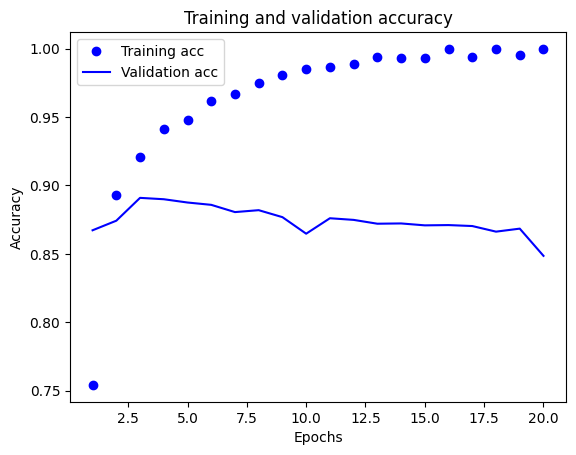

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.7038 - loss: 0.5985
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.8991 - loss: 0.3022
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9179 - loss: 0.2244
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9391 - loss: 0.1756
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8728 - loss: 0.3260


In [ ]:
results_test

[0.32050663232803345, 0.8741999864578247]

In [ ]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9490 - loss: 0.1514
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9545 - loss: 0.1352
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9628 - loss: 0.1157
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9683 - loss: 0.0999
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8708 - loss: 0.3761


In [ ]:
results_val

[0.3727293610572815, 0.8726000189781189]

**Using a trained model to generate predictions on new data**

In [ ]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


array([[0.08232244],
       [0.9999303 ],
       [0.3393363 ],
       ...,
       [0.151251  ],
       [0.02599591],
       [0.7472959 ]], dtype=float32)

**Model 4**

In [ ]:
# cresate model with 32 units in the hidden layer
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

**Validating your approach**

**Setting aside a validation set**

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training the model**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.6974 - loss: 0.5787 - val_accuracy: 0.8545 - val_loss: 0.3941
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.8977 - loss: 0.3256 - val_accuracy: 0.8825 - val_loss: 0.3148
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9203 - loss: 0.2493 - val_accuracy: 0.8591 - val_loss: 0.3316
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.9331 - loss: 0.2139 - val_accuracy: 0.8874 - val_loss: 0.2811
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9448 - loss: 0.1784 - val_accuracy: 0.8874 - val_loss: 0.2791
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.9499 - loss: 0.1639 - val_accuracy: 0.8802 - val_loss: 0.3026
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9581 - loss: 0.1427 - val_accuracy: 0.8867 - val_loss: 0.2799
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9647 - loss: 0.1258 - val_accuracy: 0.8829 - 

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

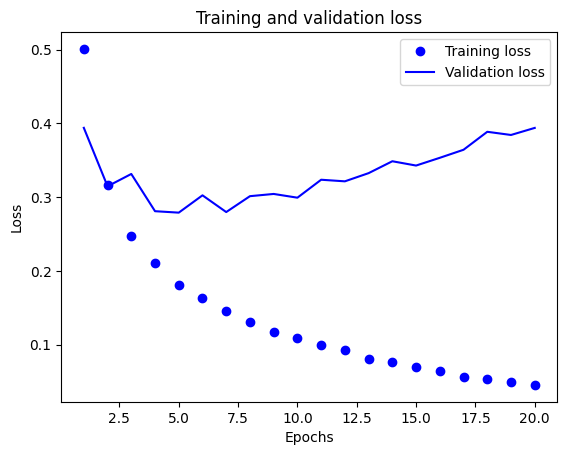

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo",  label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

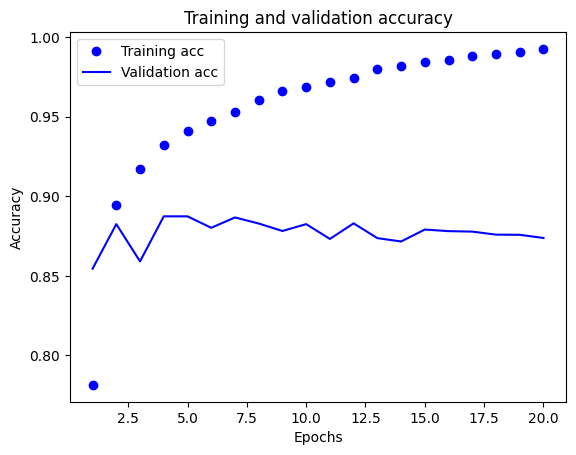

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7335 - loss: 0.5302
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9051 - loss: 0.2766
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.9217 - loss: 0.2223
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9365 - loss: 0.1834
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8835 - loss: 0.2839


In [ ]:
results_test

[0.28158167004585266, 0.8858799934387207]

In [ ]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9428 - loss: 0.1677
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9460 - loss: 0.1544
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9492 - loss: 0.1445
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.9555 - loss: 0.1300
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8750 - loss: 0.3168


In [ ]:
results_val

[0.3141007125377655, 0.8780400156974792]

**Using a trained model to generate predictions on new data**

In [ ]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.29516795],
       [0.999698  ],
       [0.9365951 ],
       ...,
       [0.15670992],
       [0.1454205 ],
       [0.631949  ]], dtype=float32)

**Model 5**

In [ ]:
# creating the model with 64 units in hidden layer
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

**Validating your approach**

**Setting aside a validation set**

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training the model**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.6694 - loss: 0.5788 - val_accuracy: 0.8579 - val_loss: 0.3712
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.8905 - loss: 0.3146 - val_accuracy: 0.8656 - val_loss: 0.3282
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.9201 - loss: 0.2414 - val_accuracy: 0.8877 - val_loss: 0.2826
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9347 - loss: 0.1984 - val_accuracy: 0.8863 - val_loss: 0.2768
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9417 - loss: 0.1787 - val_accuracy: 0.8890 - val_loss: 0.2775
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9513 - loss: 0.1537 - val_accuracy: 0.8828 - val_loss: 0.2840
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.9573 - loss: 0.1399 - val_accuracy: 0.8802 - val_loss: 0.3115
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.9562 - loss: 0.1311 - val_accuracy: 0.8738 -

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

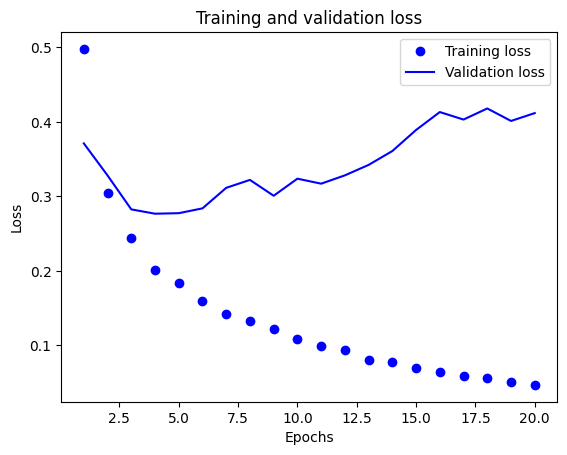

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

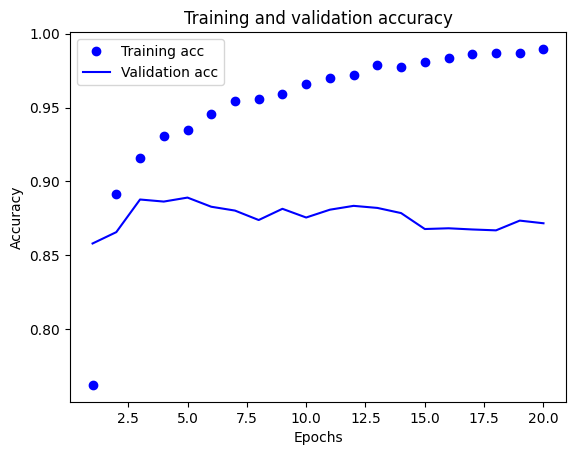

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**


In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.7216 - loss: 0.5285
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.8967 - loss: 0.2794
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9154 - loss: 0.2242
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.9340 - loss: 0.1889
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8832 - loss: 0.2839


In [ ]:
results_test

[0.28405681252479553, 0.8842800259590149]

In [ ]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9366 - loss: 0.1753
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9423 - loss: 0.1627
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9467 - loss: 0.1505
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.9518 - loss: 0.1414
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8770 - loss: 0.3134


In [ ]:
results_val

[0.30979257822036743, 0.8803600072860718]

**Using a trained model to generate predictions on new data**

In [ ]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


array([[0.18828855],
       [0.9995703 ],
       [0.7486019 ],
       ...,
       [0.08535372],
       [0.07390672],
       [0.5312041 ]], dtype=float32)

**Model 6**

In [1]:
# creating the model with MSE loss function
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

**Validating your approach**

**Setting aside a validation set**

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training the model**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.7082 - loss: 0.2046 - val_accuracy: 0.8628 - val_loss: 0.1316
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.8882 - loss: 0.1135 - val_accuracy: 0.8740 - val_loss: 0.1082
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9082 - loss: 0.0867 - val_accuracy: 0.8862 - val_loss: 0.0946
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9248 - loss: 0.0734 - val_accuracy: 0.8824 - val_loss: 0.0927
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9308 - loss: 0.0659 - val_accuracy: 0.8890 - val_loss: 0.0867
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9412 - loss: 0.0576 - val_accuracy: 0.8885 - val_loss: 0.0867
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9465 - loss: 0.0519 - val_accuracy: 0.8865 - val_loss: 0.0843
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9506 - loss: 0.0491 - val_accuracy: 0.8859 - v

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

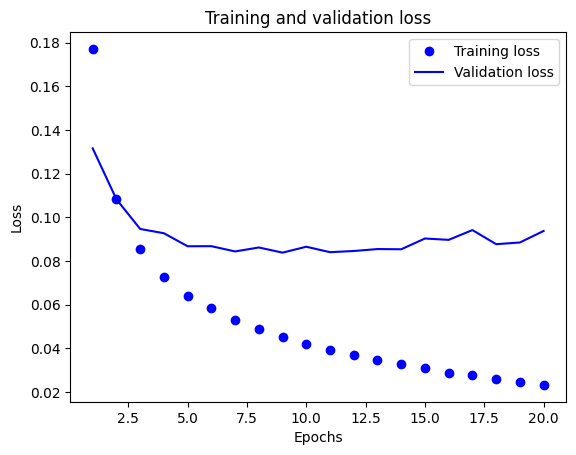

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

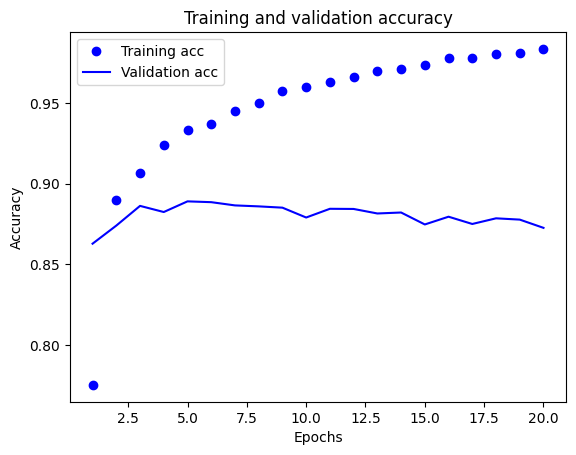

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo",label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.7497 - loss: 0.1854
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8938 - loss: 0.0972
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9115 - loss: 0.0765
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9237 - loss: 0.0664
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8869 - loss: 0.0874


In [ ]:
results_test

[0.08715330809354782, 0.8866000175476074]

In [ ]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9349 - loss: 0.0590
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9407 - loss: 0.0537
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9459 - loss: 0.0490
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9505 - loss: 0.0460
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8807 - loss: 0.0864


In [ ]:
results_val

[0.08530297875404358, 0.8838800191879272]

**Using a trained model to generate predictions on new data**

In [ ]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0.17178445],
       [0.99985147],
       [0.8556033 ],
       ...,
       [0.18115793],
       [0.11383756],
       [0.56492096]], dtype=float32)

**Building the Model 7**

In [ ]:
# creating the model with tanh activation
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

**Validating your approach**

**Setting aside a validation set**

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training the model**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.7128 - loss: 0.1980 - val_accuracy: 0.8684 - val_loss: 0.1241
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8964 - loss: 0.1049 - val_accuracy: 0.8836 - val_loss: 0.1019
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9195 - loss: 0.0797 - val_accuracy: 0.8862 - val_loss: 0.0915
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.9319 - loss: 0.0676 - val_accuracy: 0.8666 - val_loss: 0.0995
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9380 - loss: 0.0599 - val_accuracy: 0.8700 - val_loss: 0.0954
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9465 - loss: 0.0532 - val_accuracy: 0.8831 - val_loss: 0.0859
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9549 - loss: 0.0463 - val_accuracy: 0.8852 - val_loss: 0.0831
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9626 - loss: 0.0398 - val_accuracy: 0.8812 - v

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

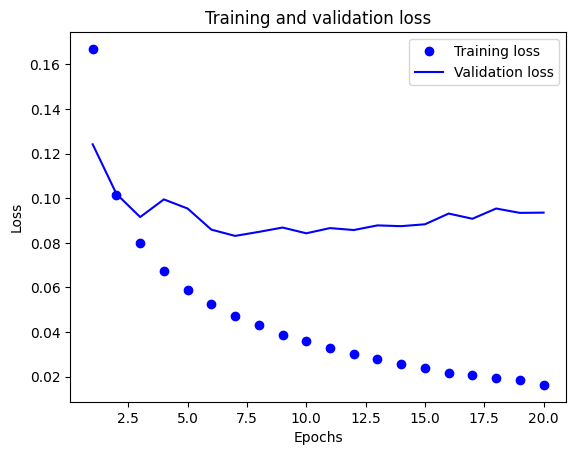

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

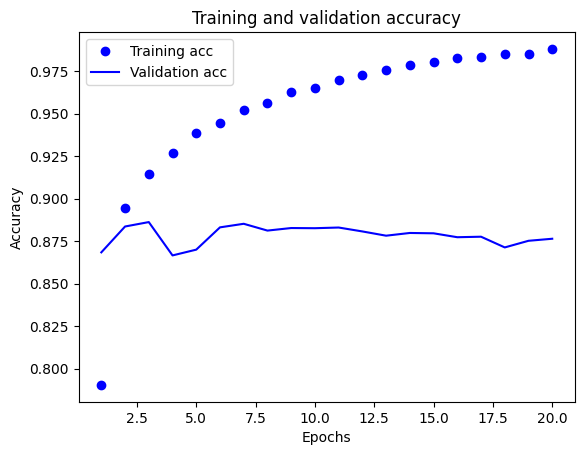

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7394 - loss: 0.1840
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8946 - loss: 0.0939
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9201 - loss: 0.0706
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9296 - loss: 0.0611
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8842 - loss: 0.0861


In [ ]:
results_test

[0.08594001829624176, 0.883840024471283]

In [ ]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9583 - loss: 0.0387
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9613 - loss: 0.0366
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9665 - loss: 0.0322
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9671 - loss: 0.0324
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8732 - loss: 0.0952


In [ ]:
results_val

[0.09360677748918533, 0.8761199712753296]

**Using a trained model to generate predictions on new data**

In [ ]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0.07115825],
       [0.9999677 ],
       [0.81753683],
       ...,
       [0.21522193],
       [0.04704713],
       [0.664817  ]], dtype=float32)

**Building the Model 8**

In [ ]:
# creating the model with regularization (L2)
from tensorflow import keras
from tensorflow.keras import layers, regularizers

model = keras.Sequential([
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(1, activation="sigmoid")
])


**Compiling the model**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

**Validating your approach**

**Setting aside a validation set**

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training the model**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.6916 - loss: 0.3944 - val_accuracy: 0.8275 - val_loss: 0.1907
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.8669 - loss: 0.1699 - val_accuracy: 0.8676 - val_loss: 0.1553
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.8759 - loss: 0.1507 - val_accuracy: 0.8594 - val_loss: 0.1536
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.8801 - loss: 0.1447 - val_accuracy: 0.8658 - val_loss: 0.1482
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.8837 - loss: 0.1401 - val_accuracy: 0.8426 - val_loss: 0.1562
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.8848 - loss: 0.1385 - val_accuracy: 0.8349 - val_loss: 0.1569
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8817 - loss: 0.1383 - val_accuracy: 0.8714 - val_loss: 0.1430
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8877 - loss: 0.1346 - val_accuracy: 0.8671 - v

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

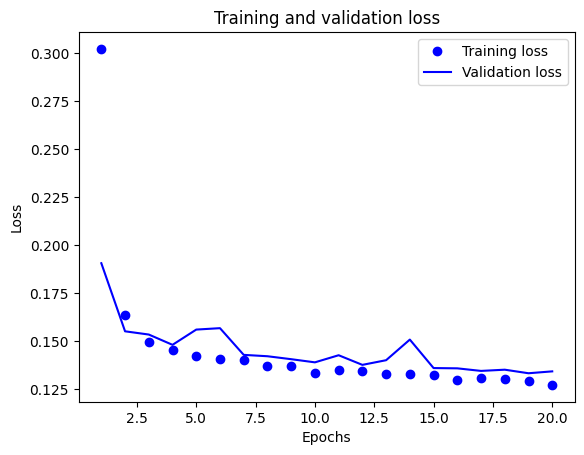

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

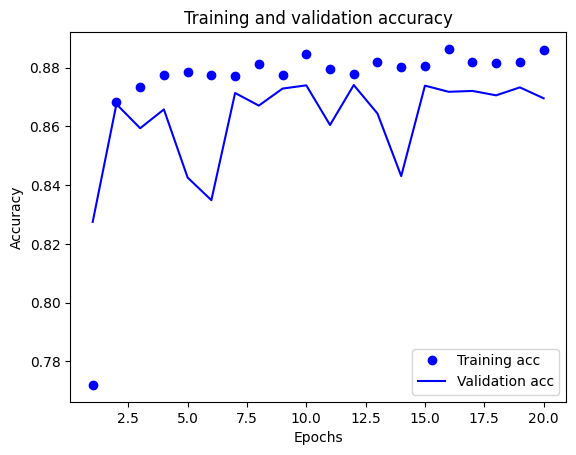

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.01) ),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7394 - loss: 0.3507
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.8658 - loss: 0.1623
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.8712 - loss: 0.1525
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8680 - loss: 0.1503
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8565 - loss: 0.1537


In [ ]:
results_test

[0.15233100950717926, 0.8595200181007385]

In [ ]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8702 - loss: 0.1470
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.8717 - loss: 0.1452
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.8778 - loss: 0.1400
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.8745 - loss: 0.1400
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8631 - loss: 0.1454


In [ ]:
results_val

[0.1451251208782196, 0.8627600073814392]

**Using a trained model to generate predictions on new data**

In [ ]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0.3995029 ],
       [0.9053619 ],
       [0.5369655 ],
       ...,
       [0.18288508],
       [0.24000373],
       [0.38683975]], dtype=float32)

**Building the Model 9**

In [ ]:
# creating the model with Dropout (0.5)
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

**Compile the model**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

**Validating your approach**

**Split the data into training and validation sets**

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Train the model with validation data**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.6451 - loss: 0.2229 - val_accuracy: 0.8458 - val_loss: 0.1533
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8210 - loss: 0.1501 - val_accuracy: 0.8680 - val_loss: 0.1218
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8644 - loss: 0.1209 - val_accuracy: 0.8750 - val_loss: 0.1065
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8801 - loss: 0.1063 - val_accuracy: 0.8781 - val_loss: 0.1007
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8970 - loss: 0.0928 - val_accuracy: 0.8831 - val_loss: 0.0931
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9040 - loss: 0.0835 - val_accuracy: 0.8864 - val_loss: 0.0885
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9147 - loss: 0.0758 - val_accuracy: 0.8869 - val_loss: 0.0874
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9271 - loss: 0.0704 - val_accuracy: 0.8887 - v

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

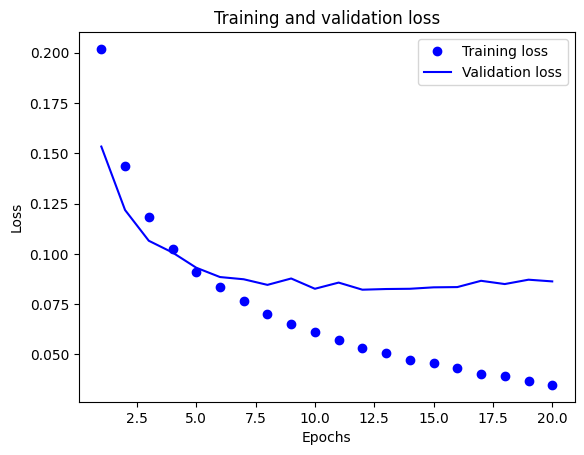

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

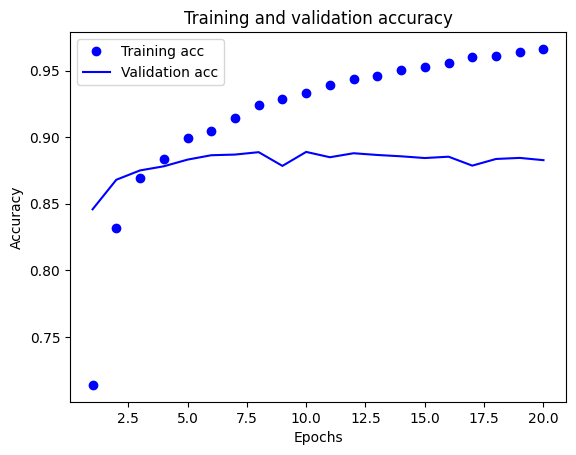

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.6683 - loss: 0.2097
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8510 - loss: 0.1286
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.8859 - loss: 0.1016
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.8940 - loss: 0.0900
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8853 - loss: 0.0886


In [ ]:
results_test

[0.08767067641019821, 0.8865600228309631]

In [ ]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9060 - loss: 0.0803
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9134 - loss: 0.0735
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9196 - loss: 0.0684
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9330 - loss: 0.0602
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8846 - loss: 0.0846


In [ ]:
results_val

[0.08414527028799057, 0.8856800198554993]

**Using a trained model to generate predictions on new data**

In [ ]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.11844088],
       [0.99871373],
       [0.79234934],
       ...,
       [0.10908873],
       [0.0860801 ],
       [0.4848825 ]], dtype=float32)

**Building the model 10**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

**Compile the model**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

**Validating your approach**

**Split the data into training and validation sets**


In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Train the model with validation data**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.6801 - loss: 0.2047 - val_accuracy: 0.8452 - val_loss: 0.1304
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.8742 - loss: 0.1135 - val_accuracy: 0.8713 - val_loss: 0.1034
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.9026 - loss: 0.0879 - val_accuracy: 0.8777 - val_loss: 0.0948
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9207 - loss: 0.0723 - val_accuracy: 0.8856 - val_loss: 0.0870
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9271 - loss: 0.0650 - val_accuracy: 0.8810 - val_loss: 0.0879
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9366 - loss: 0.0569 - val_accuracy: 0.8885 - val_loss: 0.0839
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9471 - loss: 0.0509 - val_accuracy: 0.8878 - val_loss: 0.0832
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9476 - loss: 0.0473 - val_accuracy: 0.8791 - 

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

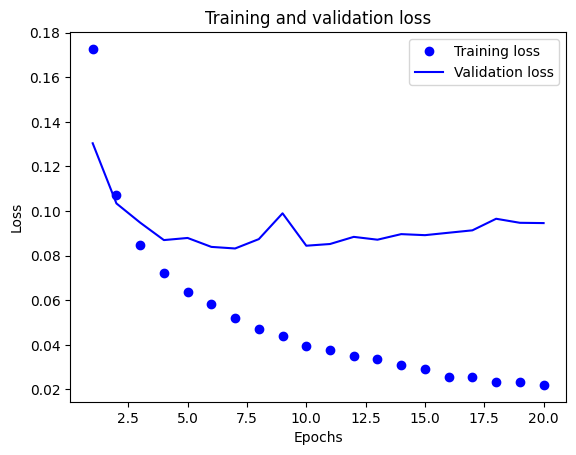

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

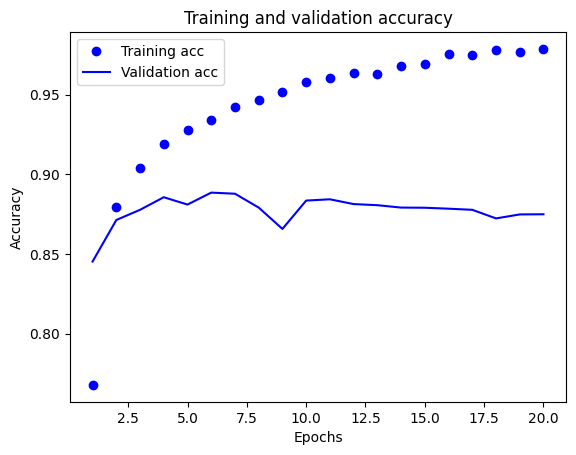

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
model = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.7186 - loss: 0.1918
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.8890 - loss: 0.0964
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9128 - loss: 0.0746
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9201 - loss: 0.0658
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8832 - loss: 0.0868


In [ ]:
results_test

[0.08667460083961487, 0.8829600214958191]

In [ ]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9273 - loss: 0.0590
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9345 - loss: 0.0540
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9444 - loss: 0.0484
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9479 - loss: 0.0450
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8672 - loss: 0.0991


In [ ]:
results_val

[0.09701380133628845, 0.8698400259017944]

**Using a trained model to generate predictions on new data**

In [ ]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


array([[0.11657103],
       [0.99864864],
       [0.8272015 ],
       ...,
       [0.10101064],
       [0.06237952],
       [0.58286744]], dtype=float32)

**Building Model 11**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compile the model**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

**Validating your approach**

**Split the data into training and validation sets**

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Train the model with validation data**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.6858 - loss: 0.5935 - val_accuracy: 0.8629 - val_loss: 0.3554
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.8849 - loss: 0.3077 - val_accuracy: 0.8720 - val_loss: 0.3156
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9138 - loss: 0.2316 - val_accuracy: 0.8856 - val_loss: 0.2813
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.9383 - loss: 0.1741 - val_accuracy: 0.8751 - val_loss: 0.3190
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.9440 - loss: 0.1500 - val_accuracy: 0.8819 - val_loss: 0.2981
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.9636 - loss: 0.1144 - val_accuracy: 0.8755 - val_loss: 0.3458
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.9707 - loss: 0.0951 - val_accuracy: 0.8754 - val_loss: 0.3454
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9735 - loss: 0.0813 - val_accuracy: 0.8822 -

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

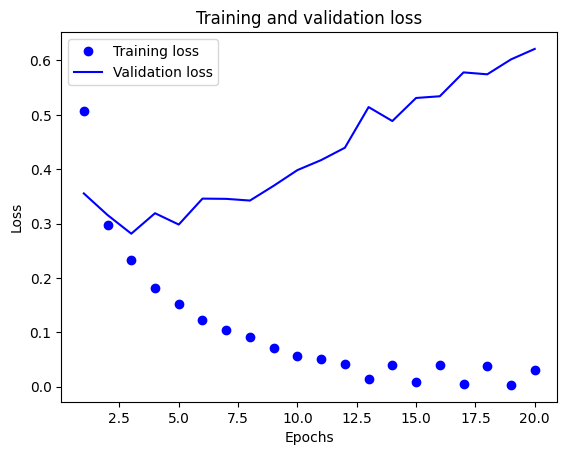

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

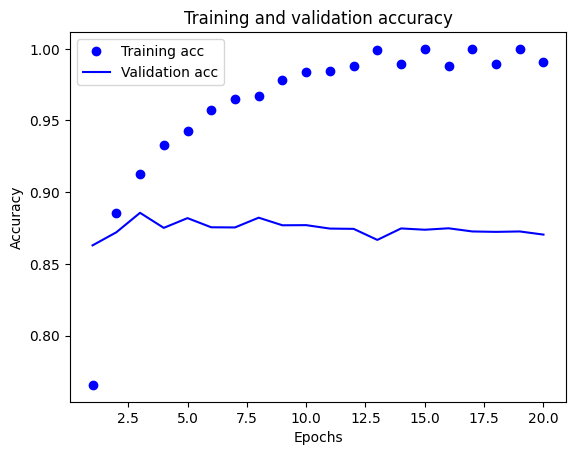

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.7023 - loss: 0.1966
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.8871 - loss: 0.0898
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.9068 - loss: 0.0726
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.9235 - loss: 0.0606
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8845 - loss: 0.0851


In [ ]:
results_test

[0.08403456956148148, 0.8871999979019165]

In [ ]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9322 - loss: 0.0541
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.9431 - loss: 0.0463
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.9461 - loss: 0.0442
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.9522 - loss: 0.0399
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8715 - loss: 0.0965


In [ ]:
results_val

[0.0953616052865982, 0.8732399940490723]